In [1]:
import sys
import cv2 
import os 
import re
import numpy as np
import sklearn as sk
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
# import tensorflow as tf
import matplotlib.pyplot as plt 
import random
sys.path.append("./caffe-tensorflow/")
from vggface import VGG_FACE_16_layer
print(tf.__version__)


Instructions for updating:
non-resource variables are not supported in the long term
2.1.0


In [2]:
#TODO: add ability to automatically download and situate matroid s3 data in loc
def grab_data(data_dir = "./data"):
    reg_compile = re.compile(".*_F")
    female_paths = []
    male_paths = []

    loc_dirs = [os.path.join(data_dir,"combined/aligned"),os.path.join(data_dir,"combined/valid")]
    for loc_dir in loc_dirs:
        result_F = []
        result_M = []
        for dirpath,dirnames,filenames in os.walk(loc_dir):
            result_F = result_F + [dirname for dirname in dirnames if reg_compile.match(dirname)]
            result_M = result_M + [dirname for dirname in dirnames if not reg_compile.match(dirname)]
        for directory in result_F:
            current_directory = os.path.join(loc_dir,directory)
            for (dirpath, dirnames, filenames) in os.walk(current_directory):
                female_paths += [os.path.join(current_directory,filename) for filename in filenames]
        for directory in result_M:
            current_directory = os.path.join(loc_dir,directory)
            for (dirpath, dirnames, filenames) in os.walk(current_directory):
                male_paths += [os.path.join(current_directory,filename) for filename in filenames]

    return female_paths,male_paths
female_paths,male_paths = grab_data()
print(len(female_paths))
print(female_paths[16000])
print(len(male_paths))
print(male_paths[16000])

16064
./data/combined/valid/60_F/nm0004920_rm1444654848_1952-5-11_2012.jpg
17054
./data/combined/valid/60_M/nm0141961_rm978832640_1953-7-17_2014.jpg


Text(0.5,1,'./data/combined/aligned/08_M/nm0539678_rm3184428288_1984-7-7_1993.jpg')

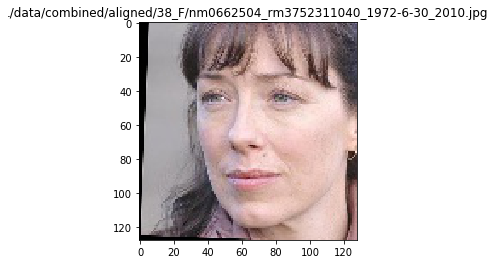

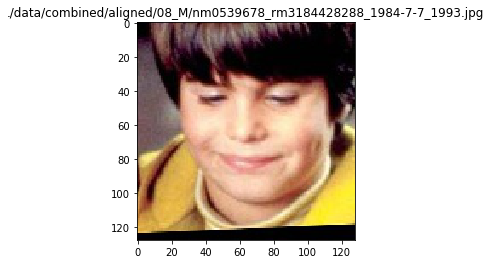

In [3]:
rng_f = female_paths[np.random.randint(0,len(female_paths))]

plt.figure()
plt.imshow(plt.imread(rng_f))
plt.title("{}".format(rng_f))

rng_m = male_paths[np.random.randint(0,len(male_paths))]

plt.figure()
plt.imshow(plt.imread(rng_m))
plt.title("{}".format(rng_m))

In [4]:
ex = cv2.resize(plt.imread(rng_f),(224,224)).astype(np.float32)[np.newaxis,:,:,:]
ex = np.concatenate((ex,ex),axis=0)
ex.shape

(2, 224, 224, 3)

In [5]:
net = VGG_FACE_16_layer({'data':tf.convert_to_tensor(ex)})

In [8]:
with tf.Session() as sesh:
    # Load the data
    net.load('vggface.npy', sesh)
    # Forward pass
    output = sesh.run(net.get_output())

In [7]:
output.shape

(2, 2622)